<a href="https://colab.research.google.com/github/Gituhin/Image-noising-Denoising/blob/main/assn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Required libraries

In [ ]:
import cv2
import random as ran
from google.colab.patches import cv2_imshow
import statistics as st



noising the image by randomly corrupting pixels

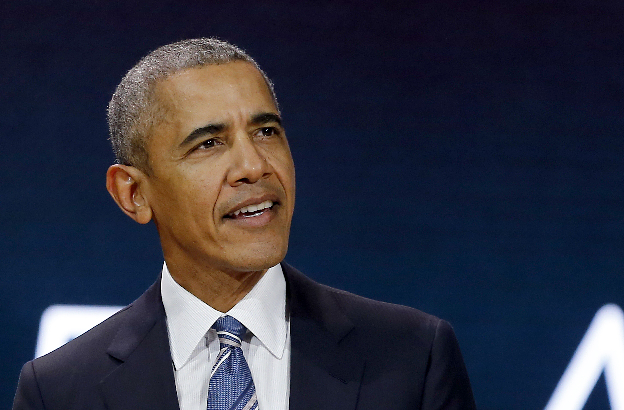

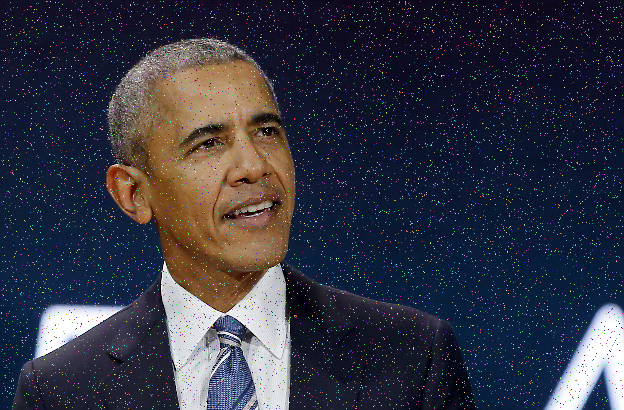

True


In [ ]:
img=cv2.imread('/content/drive/My Drive/Assignments/assign1/obama.jpeg')
h, w=img.shape[:2]
img1 = cv2.resize(img,(int(w/3), int(h/3)),interpolation = cv2.INTER_CUBIC)  #resizing the image
h_lt, v_lt=img1.shape[0], img1.shape[1]   #taking the dimensions into variables and using them as horizontal and vertical limits
cv2_imshow(img1)
noise_px=int(0.04*h_lt*v_lt)      #corrupting 4% of the total pixels of the resized image

for i in range(0, noise_px):
  h=ran.randint(1, h_lt-2)  #choosing random row
  v=ran.randint(1, v_lt-2)  #choosing random coloumn
  img1[h][v][0]=ran.randint(0,255)    #corrupting RED
  img1[h][v][1]=ran.randint(0,255)    #corrupting GREEN
  img1[h][v][2]=ran.randint(0,255)    #corrupting BLUE

print('\n')
cv2_imshow(img1)    #showing corrupt image
st=cv2.imwrite('/content/drive/My Drive/Assignments/noised_obama.png', img1)    #saving the corrupted image in local directory
print(st)

replacing the corrupt pixels(of noised image) with the **average** of values of neighbours

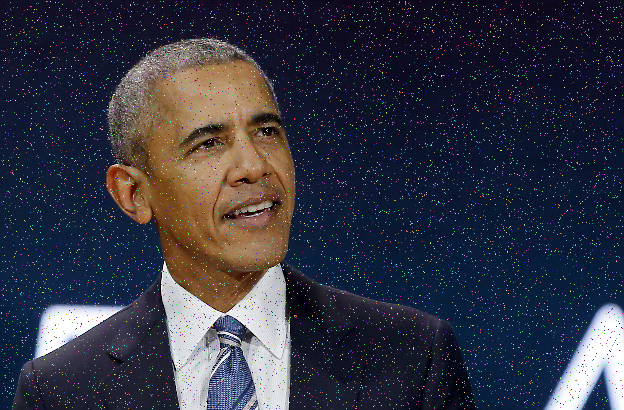

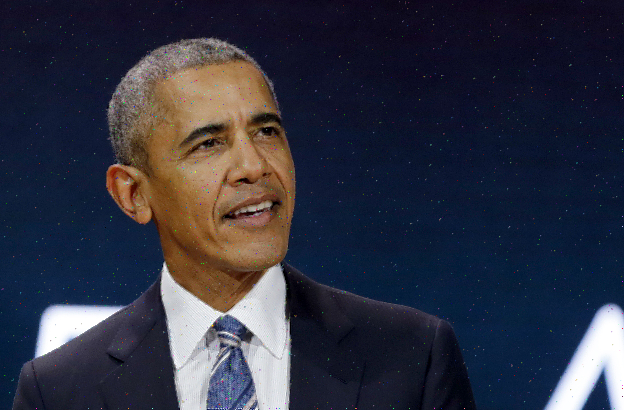

In [ ]:
n_img=cv2.imread('/content/drive/My Drive/Assignments/noised_obama.png') #loading the corrupted image from the locally saved directory
cv2_imshow(n_img)
threshold=100     #setting threshold limit for identification of the corrupt pixels
for h in range(1, h_lt-2):    #looping accross the rows
  for v in range(1, v_lt-2):    #looping accross the columns

    lst=[]        #an empty list for storing the difference in values of the target pixel from the neighbouring pixels
    c=0           #counter set to 0(for counting the normal pixels arounf the target pixel)

    R, G, B=n_img[h][v][0], n_img[h][v][1], n_img[h][v][2] #storing the RGB values of the target pixel and summing up
    sumRGB=int(R)+int(G)+int(B)
    sum_f=int(n_img[h][v+1][0]) + int(n_img[h][v+1][1])+ int(n_img[h][v+1][2])    
    sum_b=int(n_img[h][v-1][0]) + int(n_img[h][v-1][1]) + int(n_img[h][v-1][2])     #summing up the RGB values of the up, down, right and left pixels of the target pixel
    sum_up=int(n_img[h+1][v][0]) + int(n_img[h+1][v][1])+ int(n_img[h+1][v][2])
    sum_down=int(n_img[h-1][v][0]) + int(n_img[h-1][v][1]) + int(n_img[h-1][v][2])
    df, db, dup, ddown=abs(sum_f-sumRGB), abs(sum_b-sumRGB), abs(sum_up-sumRGB), abs(sum_down-sumRGB) 
    #calculating the difference between the 4 neighbouring pixels to the target pixel and storing them in the list below 
    lst=[df, db, dup, ddown]

    for j in lst:
      if j>threshold:   #checking the list elements if the difference is greater then threshold( there maybe pixels corrupted just near to another corrupted pixel)
        c+=1

    if c>=2:
      for i in range(0,3):    #if no. of pixels having high difference are greater or equal 2 then target pixel identified as corrupted
        up=n_img[h-1][v][i]
        down=n_img[h+1][v][i]     #storing the values of neighbouring pixels(up, down, right, left)
        right=n_img[h][v+1][i]
        left=n_img[h][v-1][i]
      
        avg=(int(up)+int(down)+int(right)+int(left))/4
        int_avg=int(avg)            #finding their mean and replacing the target pixel with that value
        n_img[h][v][i]=int_avg
      
print('\n')
cv2_imshow(n_img)       #displaying the smoothened image

Replacing the corrupt pixels with the **median** value of the different neighbours

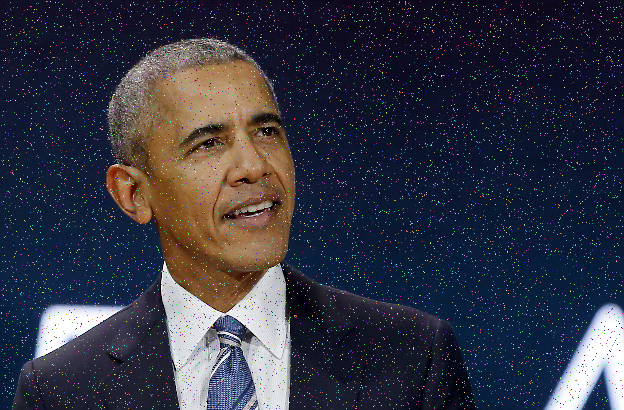

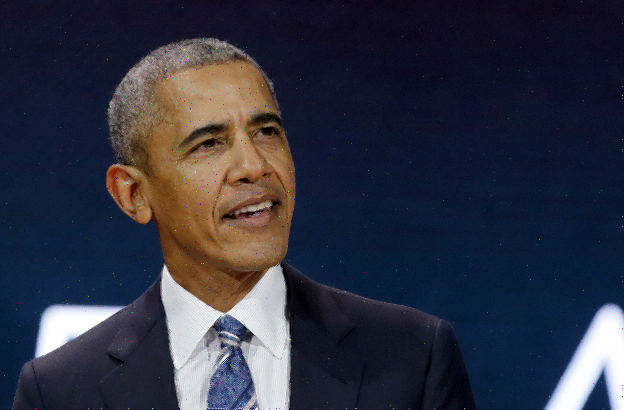

In [ ]:
n_img=cv2.imread('/content/drive/My Drive/Assignments/noised_obama.png')
cv2_imshow(n_img)
threshold=100
for h in range(1, h_lt-2):
  for v in range(1, v_lt-2):
    lst=[]
    c=0
    R, G, B=n_img[h][v][0], n_img[h][v][1], n_img[h][v][2]
    sumRGB=int(R)+int(G)+int(B)
    sum_f=int(n_img[h][v+1][0]) + int(n_img[h][v+1][1])+ int(n_img[h][v+1][2])
    sum_b=int(n_img[h][v-1][0]) + int(n_img[h][v-1][1]) + int(n_img[h][v-1][2])
    sum_up=int(n_img[h+1][v][0]) + int(n_img[h+1][v][1])+ int(n_img[h+1][v][2])
    sum_down=int(n_img[h-1][v][0]) + int(n_img[h-1][v][1]) + int(n_img[h-1][v][2])
    df, db, dup, ddown=abs(sum_f-sumRGB), abs(sum_b-sumRGB), abs(sum_up-sumRGB), abs(sum_down-sumRGB) 
    lst=[df, db, dup, ddown]

    for j in lst:
      if j>threshold:
        c+=1

    if c>=2:
      for i in range(0,3):
        up_rgt=n_img[h-1][v+1][i]
        up_lft=n_img[h-1][v-1][i]
        down_rgt=n_img[h+1][v+1][i]     # Taking neighbours as(up left, up right, down left, down right for replacement)
        down_lft=n_img[h+1][v-1][i]

        val=st.median([int(up_rgt), int(up_lft), int(down_lft), int(down_rgt)])
        n_img[h][v][i]=val        #replacing with the median value of the neighbouring pixels
      
print('\n')
cv2_imshow(n_img)

following is the image used- https://drive.google.com/file/d/1wLQp3OmZzrJ8Abys7dD9KPlJSR-hwLoy/view?usp=sharing

following is the saved noised image- https://drive.google.com/file/d/1HevIjaw9QxRauxolLR8u7ZxvdM2ekS_K/view?usp=sharing